## CHOIX DE METRIQUE
**F1-Score** comme métrique à surveiller/optimiser.
- Dans ce projet, l’objectif est de prédire si un individu va répondre positivement à une campagne marketing.

Le budget de contact est limité, et chaque contact inutile représente un coût (temps, image, argent).

Notre but est donc à la fois d'éviter :

- Les faux positifs (cibler quelqu’un qui ne répondra pas)

- Les faux négatifs (rater une personne qui aurait répondu).

La F1-Score nous permet de trouver un équilibre entre la précision et le recall.


In [38]:
import pandas as pd
import pandas
import numpy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,  confusion_matrix, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D

In [39]:
response_df = pd.read_csv('Dataset_Reponse_Marketing.csv')

In [41]:
response_df.head()

,Age,Sexe,Revenu_annuel,Temps_passe_sur_site,Achats_en_ligne,Reponse_campagne
0,22,Homme,40124,16.518974,9,1
1,32,Femme,26307,21.973535,8,1
2,28,Femme,30040,26.762915,9,1
3,16,Femme,15843,29.046008,9,0
4,45,Homme,20225,21.479944,5,0


In [42]:
print((response_df == "?").sum())
print((response_df == "NA").sum())
print((response_df == "None").sum())

Age                     0
Sexe                    0
Revenu_annuel           0
Temps_passe_sur_site    0
Achats_en_ligne         0
Reponse_campagne        0
dtype: int64
Age                     0
Sexe                    0
Revenu_annuel           0
Temps_passe_sur_site    0
Achats_en_ligne         0
Reponse_campagne        0
dtype: int64
Age                     0
Sexe                    0
Revenu_annuel           0
Temps_passe_sur_site    0
Achats_en_ligne         0
Reponse_campagne        0
dtype: int64


In [43]:
print(response_df.dtypes)

Age                       int64
Sexe                     object
Revenu_annuel             int64
Temps_passe_sur_site    float64
Achats_en_ligne           int64
Reponse_campagne          int64
dtype: object


In [44]:
print(response_df["Reponse_campagne"].value_counts())

Reponse_campagne
1    1263
0    1137
Name: count, dtype: int64


In [45]:
response_encoded = pd.get_dummies(response_df, columns=["Sexe"], drop_first=True)

In [46]:
print(response_encoded.columns)

Index(['Age', 'Revenu_annuel', 'Temps_passe_sur_site', 'Achats_en_ligne',
       'Reponse_campagne', 'Sexe_Homme'],
      dtype='object')


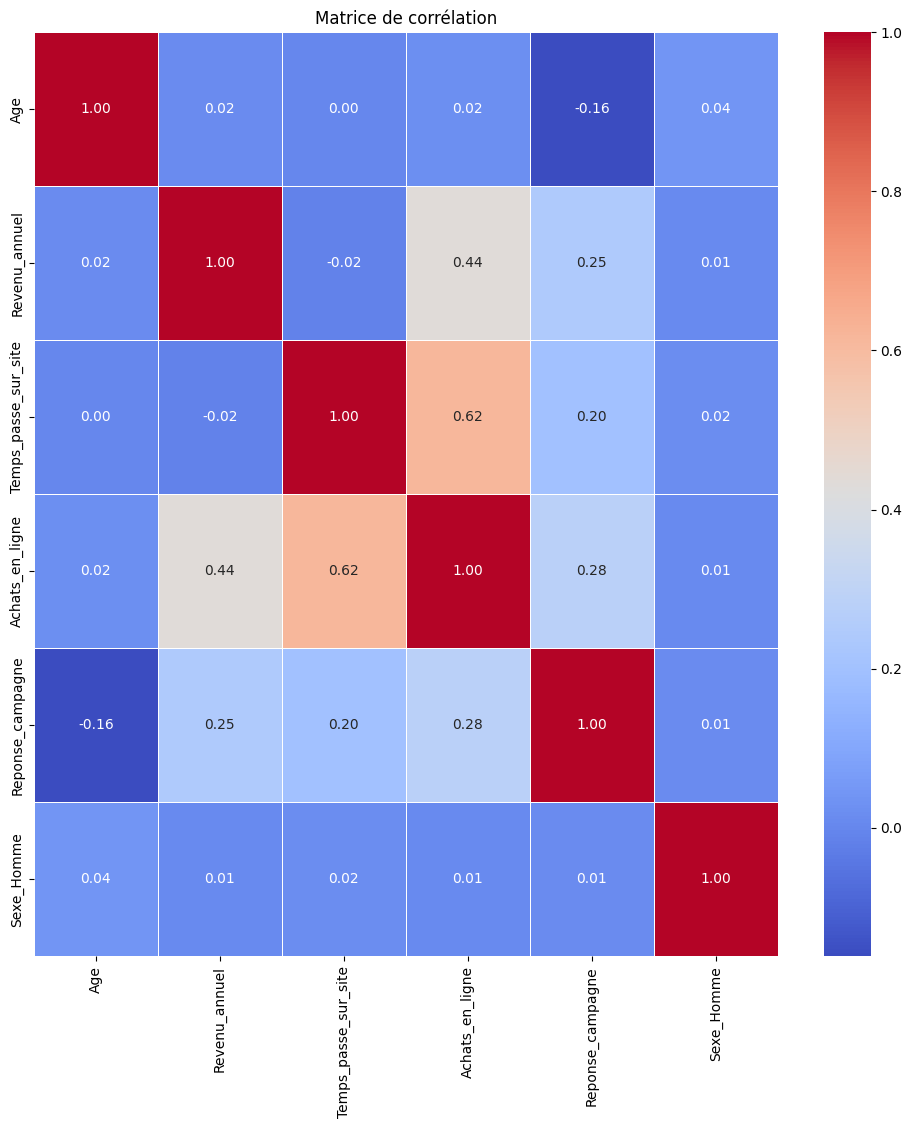

In [47]:
corr_matrix = response_encoded.corr()
plt.figure(figsize=(12, 12))
seaborn.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Matrice de corrélation")
plt.show()


In [48]:
cor_target = response_encoded.corr()["Reponse_campagne"].sort_values(ascending=False)
print(cor_target)

Reponse_campagne        1.000000
Achats_en_ligne         0.280061
Revenu_annuel           0.246046
Temps_passe_sur_site    0.199408
Sexe_Homme              0.014189
Age                    -0.161516
Name: Reponse_campagne, dtype: float64


In [49]:
# Séparation des variables
problem = response_encoded.drop("Reponse_campagne", axis=1)
solution = response_encoded["Reponse_campagne"]

In [50]:
# Standardisation
scaler_object = StandardScaler()
normalized_problem = scaler_object.fit_transform(problem)

# DataFrame standardisé
normalized_df = pd.DataFrame(normalized_problem, columns=problem.columns)

print("DONNÉES STANDARDISÉES")
print("Aperçu :")
print(normalized_df.head())

print(f"\nStatistiques descriptives :")
print(normalized_df.describe())

print(f" VÉRIFICATION DE LA STANDARDISATION")
print("Moyennes (doivent être ≈ 0) :")
print(normalized_df.mean().round(10))
print(f"\nÉcarts-types (doivent être ≈ 1) :")
print(normalized_df.std().round(10))

DONNÉES STANDARDISÉES
Aperçu :
        Age  Revenu_annuel  Temps_passe_sur_site  Achats_en_ligne  Sexe_Homme
0 -1.250473       1.972510             -1.391130         0.842310    1.032184
1 -0.258919       0.015579             -0.025101         0.222014   -0.968819
2 -0.655541       0.544292              1.174342         0.842310   -0.968819
3 -1.845405      -1.466460              1.746115         0.842310   -0.968819
4  1.030100      -0.845828             -0.148715        -1.638872    1.032184

Statistiques descriptives :
                Age  Revenu_annuel  Temps_passe_sur_site  Achats_en_ligne  \
count  2.400000e+03   2.400000e+03          2.400000e+03     2.400000e+03   
mean   1.467345e-16  -1.406282e-16         -8.334074e-16     2.923587e-16   
std    1.000208e+00   1.000208e+00          1.000208e+00     1.000208e+00   
min   -3.531046e+00  -3.084041e+00         -3.360219e+00    -3.499759e+00   
25%   -6.555408e-01  -6.773918e-01         -6.743182e-01    -3.982814e-01   
50%    3.8

In [51]:
x_train, x_test, y_train, y_test = train_test_split(normalized_problem, solution)

In [52]:
pca_object = PCA(3)

In [53]:
x_train_pca = pca_object.fit_transform(x_train)

In [54]:
problem = pandas.DataFrame(normalized_df)
pandas.DataFrame(pca_object.components_, index=[f"PC_{i+1}" for i in range(pca_object.n_components_)],
    columns=problem.columns)

,Age,Revenu_annuel,Temps_passe_sur_site,Achats_en_ligne,Sexe_Homme
PC_1,0.032772,0.400924,0.573465,0.712570,0.039598
PC_2,0.498544,0.636469,-0.480794,-0.012947,0.339161
PC_3,0.435618,-0.482971,0.303801,-0.031437,0.695480


In [55]:
explained_variance = pca_object.explained_variance_ratio_
cumulative_variance = numpy.cumsum(explained_variance)
print("explained_variance:", len(explained_variance))
print("cumulative_variance:", len(cumulative_variance))


explained_variance: 3
cumulative_variance: 3


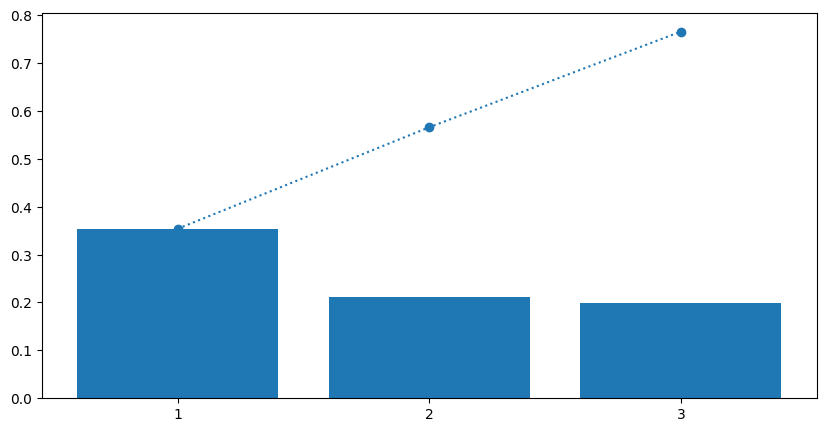

In [56]:
n = len(explained_variance)
plt.figure(figsize=(10, 5))
plt.xticks(ticks= range(1,n+1))
plt.bar(range(1, n+1), explained_variance)
plt.plot(range(1, n+1), cumulative_variance, "o:")
plt.show()

In [57]:
compressed_data = x_train_pca[:, :3]

In [58]:
compressed_data

array([[ 2.52764894, -0.79226857,  0.88111258],
       [-2.24919926,  0.45020954, -1.35622074],
       [-2.78676931,  0.02882456,  0.62304771],
       ...,
       [ 0.96917047, -1.9879396 , -0.21440776],
       [-0.03396121, -1.09268927,  0.54090613],
       [ 0.06338201,  0.23964438, -1.28244796]])

[]

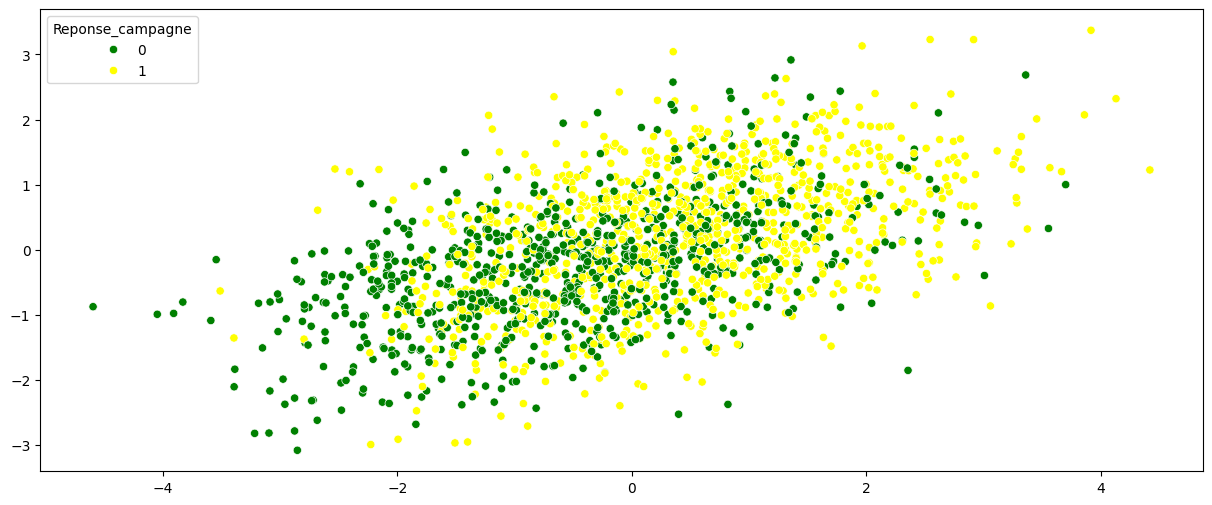

In [59]:
plt.figure(figsize=(15,6))
custom_palette = {0: "green", 1: "yellow", 2: "red"}
seaborn.scatterplot(x=x_train_pca[:,0], y=x_train[:, 1], hue=y_train, palette=custom_palette)
plt.plot()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


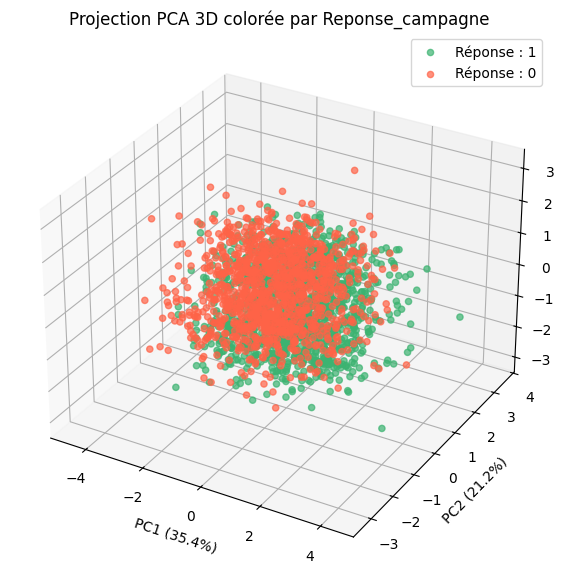

In [61]:
# projection sur les 3 premières composantes
X_pca = pca_object.transform(normalized_df)

# créer un DataFrame avec les 3 composantes
pca_df = pd.DataFrame(X_pca[:, :3], columns=["PC1", "PC2", "PC3"])
pca_df["Reponse_campagne"] = solution.values

#plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

colors = {0: "tomato", 1: "mediumseagreen"}

for val in pca_df["Reponse_campagne"].unique():
    subset = pca_df[pca_df["Reponse_campagne"] == val]
    ax.scatter(subset["PC1"], subset["PC2"], subset["PC3"],
               label=f"Réponse : {val}",
               color=colors[val],
               alpha=0.7)

explained = pca_object.explained_variance_ratio_[:3] * 100
ax.set_xlabel(f"PC1 ({explained[0]:.1f}%)")
ax.set_ylabel(f"PC2 ({explained[1]:.1f}%)")
ax.set_zlabel(f"PC3 ({explained[2]:.1f}%)")

ax.set_title("Projection PCA 3D colorée par Reponse_campagne")
ax.legend()
plt.show()


### Regression Logistique

In [62]:
log_model = LogisticRegression(random_state=42)
log_model.fit(x_train, y_train)
log_pred = log_model.predict(x_test)

print("Régression Logistique")
print("F1-score :", f1_score(y_test, log_pred))
print("Classification Report :\n", classification_report(y_test, log_pred))

Régression Logistique
F1-score : 0.6538461538461539
Classification Report :
               precision    recall  f1-score   support

           0       0.65      0.61      0.62       297
           1       0.64      0.67      0.65       303

    accuracy                           0.64       600
   macro avg       0.64      0.64      0.64       600
weighted avg       0.64      0.64      0.64       600



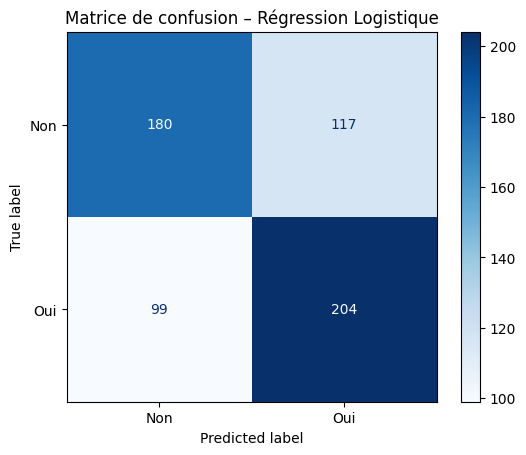

In [63]:
cm_log = confusion_matrix(y_test, log_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Non", "Oui"])
disp_log.plot(cmap="Blues")
plt.title("Matrice de confusion – Régression Logistique")
plt.show()

In [65]:
# Optimisation du modèle avec le gridsearch
log_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear'],
}

log_grid = GridSearchCV(
    LogisticRegression(random_state=42),
    log_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

log_grid.fit(x_train, y_train)
best_log_model = log_grid.best_estimator_
log_pred = best_log_model.predict(x_test)

print("Régression Logistique avec GridSearch et paramètres optimisés")
print("Meilleurs paramètres :", log_grid.best_params_)
print("F1-score (validation croisée) :", log_grid.best_score_)
print("F1-score (test set) :", f1_score(y_test, log_pred))
print("\nClassification report :\n", classification_report(y_test, log_pred))


Régression Logistique avec GridSearch et paramètres optimisés
Meilleurs paramètres : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
F1-score (validation croisée) : 0.6866093106933381
F1-score (test set) : 0.657051282051282

Classification report :
               precision    recall  f1-score   support

           0       0.65      0.61      0.63       297
           1       0.64      0.68      0.66       303

    accuracy                           0.64       600
   macro avg       0.64      0.64      0.64       600
weighted avg       0.64      0.64      0.64       600



### Decision Tree

In [66]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)
tree_pred = tree_model.predict(x_test)

print("\n Arbre de Décision")
print("F1-score :", f1_score(y_test, tree_pred))
print("Classification Report :\n", classification_report(y_test, tree_pred))


 Arbre de Décision
F1-score : 0.5690515806988353
Classification Report :
               precision    recall  f1-score   support

           0       0.56      0.57      0.57       297
           1       0.57      0.56      0.57       303

    accuracy                           0.57       600
   macro avg       0.57      0.57      0.57       600
weighted avg       0.57      0.57      0.57       600



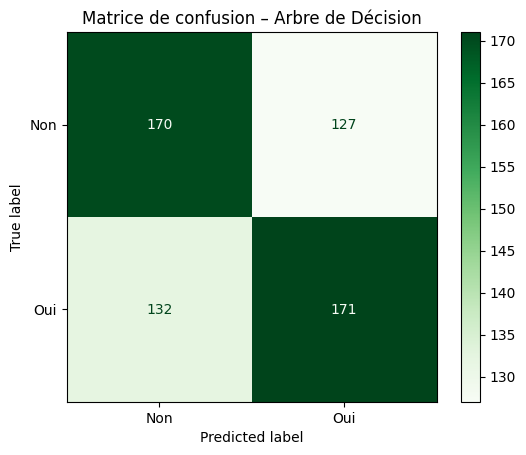

In [67]:
cm_tree = confusion_matrix(y_test, tree_pred)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=["Non", "Oui"])
disp_tree.plot(cmap="Greens")
plt.title("Matrice de confusion – Arbre de Décision")
plt.show()

In [68]:
# Arbre de décision avec hyperparametres et gridsearch
tree_params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini']
}

tree_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    tree_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

tree_grid.fit(x_train, y_train)
best_tree_model = tree_grid.best_estimator_
tree_pred = best_tree_model.predict(x_test)

print("\n Arbre de Décision optimisé")
print("Meilleurs paramètres :", tree_grid.best_params_)
print("F1-score (validation croisée) :", tree_grid.best_score_)
print("F1-score (test set) :", f1_score(y_test, tree_pred))
print("\nClassification report :\n", classification_report(y_test, tree_pred))


 Arbre de Décision optimisé
Meilleurs paramètres : {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
F1-score (validation croisée) : 0.720656536557275
F1-score (test set) : 0.6934984520123839

Classification report :
               precision    recall  f1-score   support

           0       0.69      0.60      0.64       297
           1       0.65      0.74      0.69       303

    accuracy                           0.67       600
   macro avg       0.67      0.67      0.67       600
weighted avg       0.67      0.67      0.67       600



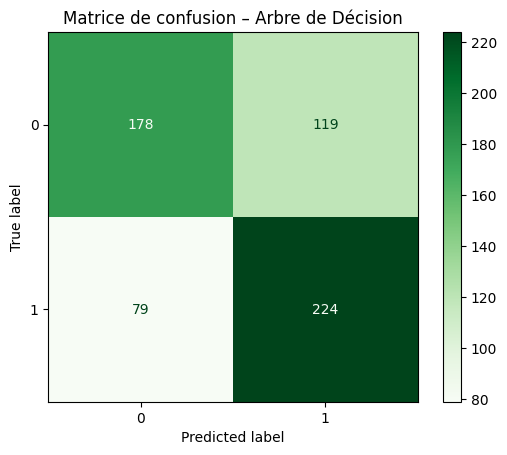

In [69]:
# nouvelle matrice de confusion
ConfusionMatrixDisplay.from_estimator(best_tree_model, x_test, y_test, cmap="Greens")
plt.title("Matrice de confusion – Arbre de Décision")
plt.show()

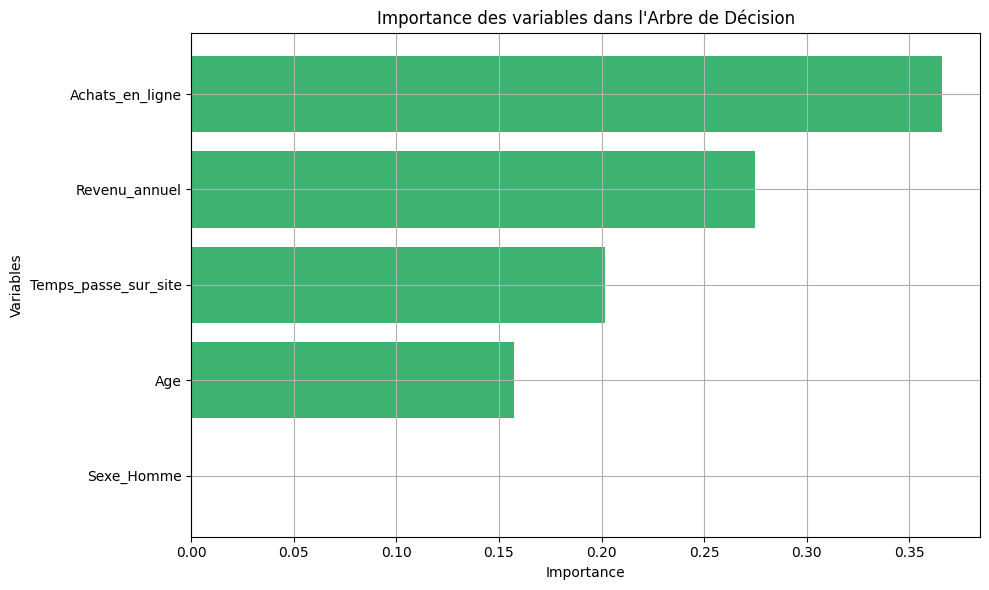

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Récupérer les noms des colonnes utilisées pour l'entraînement
feature_names = problem.columns  # ou response_encoded.drop("Reponse_campagne", axis=1).columns

# Récupérer l'importance des features
importances = best_tree_model.feature_importances_

# Créer un DataFrame pour trier et afficher
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["Feature"][:10][::-1], feat_imp_df["Importance"][:10][::-1], color="mediumseagreen")
plt.title("Importance des variables dans l'Arbre de Décision")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.grid(True)
plt.tight_layout()
plt.show()


#Note :
l'arbre de décision a de meilleurs performances que la regression logistique (atteint jusqu'à 72% de F1-score en cross validation)